<a href="https://colab.research.google.com/github/FZsara/image_processing/blob/main/ip_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
from google.colab import drive
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


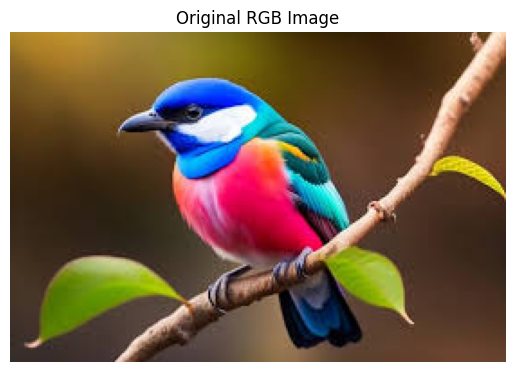

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the RGB image
image_path = '/content/drive/MyDrive/birdie.jpg'
img = np.array(Image.open(image_path))

# Display the original RGB image
plt.imshow(img)
plt.title("Original RGB Image")
plt.axis('off')
plt.show()


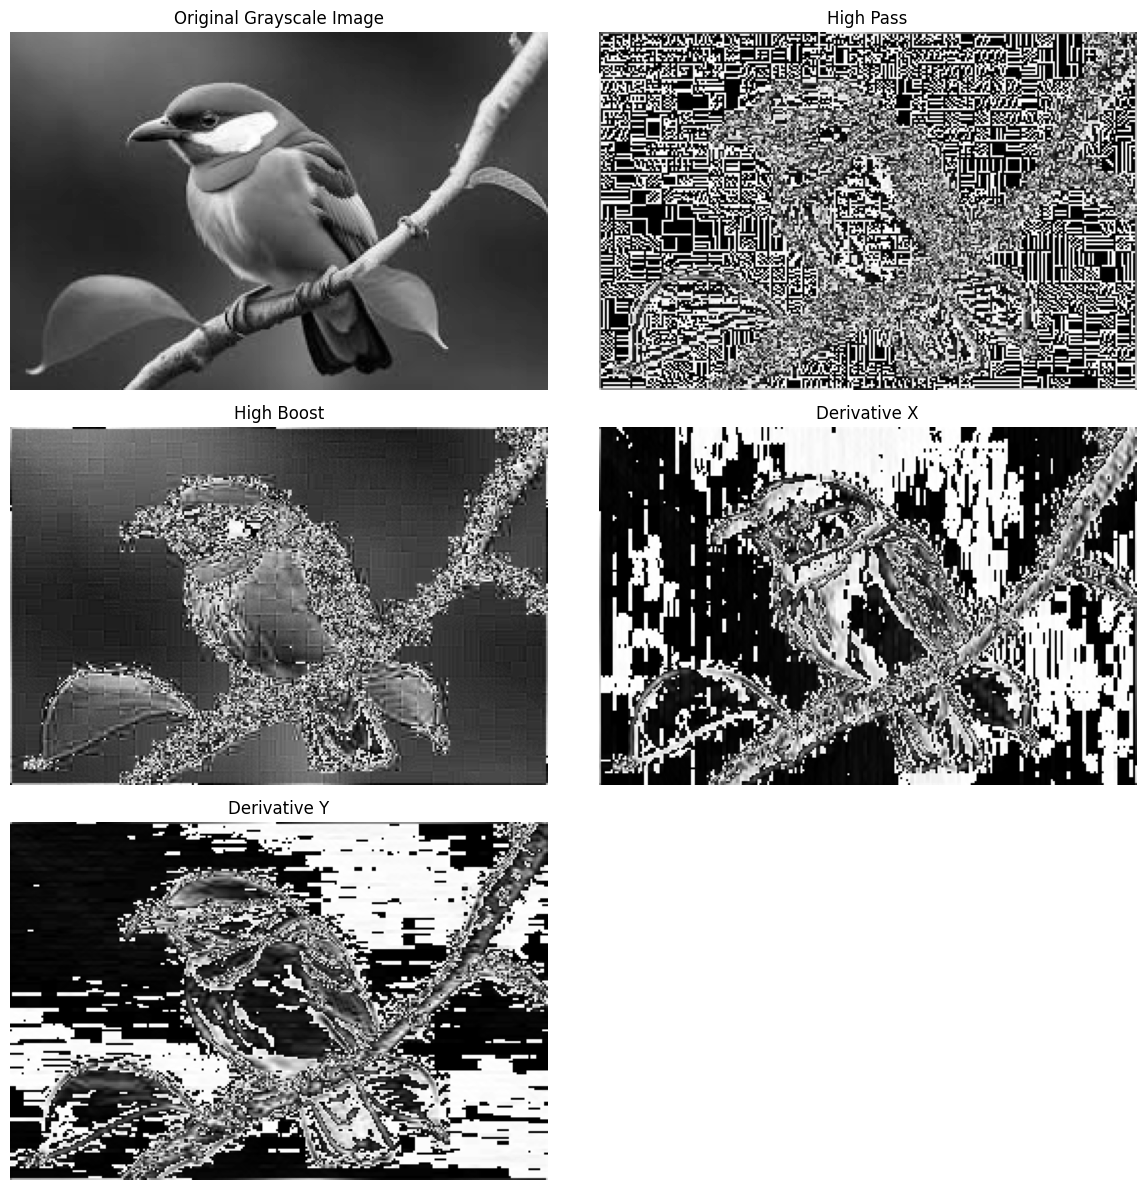

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the color image and convert to grayscale
image_path = '/content/drive/MyDrive/birdie.jpg'
img = np.array(Image.open(image_path))
gray_img = np.mean(img, axis=2).astype(np.uint8)  # Convert RGB to grayscale manually by averaging channels

# Convolution function for grayscale images
def convolve_gray(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    padded_img = np.pad(image, ((kh // 2, kh // 2), (kw // 2, kw // 2)), mode='constant', constant_values=0)
    output = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            region = padded_img[i:i + kh, j:j + kw]
            output[i, j] = np.sum(region * kernel)

    # Normalize and clip to range [0, 255]
    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)

# Define kernels
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

high_boost_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])  # Example with A=2

derivative_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

derivative_y = np.array([[1,  2,  1],
                         [0,  0,  0],
                         [-1, -2, -1]])

# Apply filters
filters = {
    "High Pass": high_pass_kernel,
    "High Boost": high_boost_kernel,
    "Derivative X": derivative_x,
    "Derivative Y": derivative_y
}

# Display original grayscale image and filtered results
plt.figure(figsize=(12, 12))

# Show original grayscale image
plt.subplot(3, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

# Apply each filter and display results
for idx, (filter_name, kernel) in enumerate(filters.items(), start=2):
    filtered_img = convolve_gray(gray_img, kernel)
    plt.subplot(3, 2, idx)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(filter_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


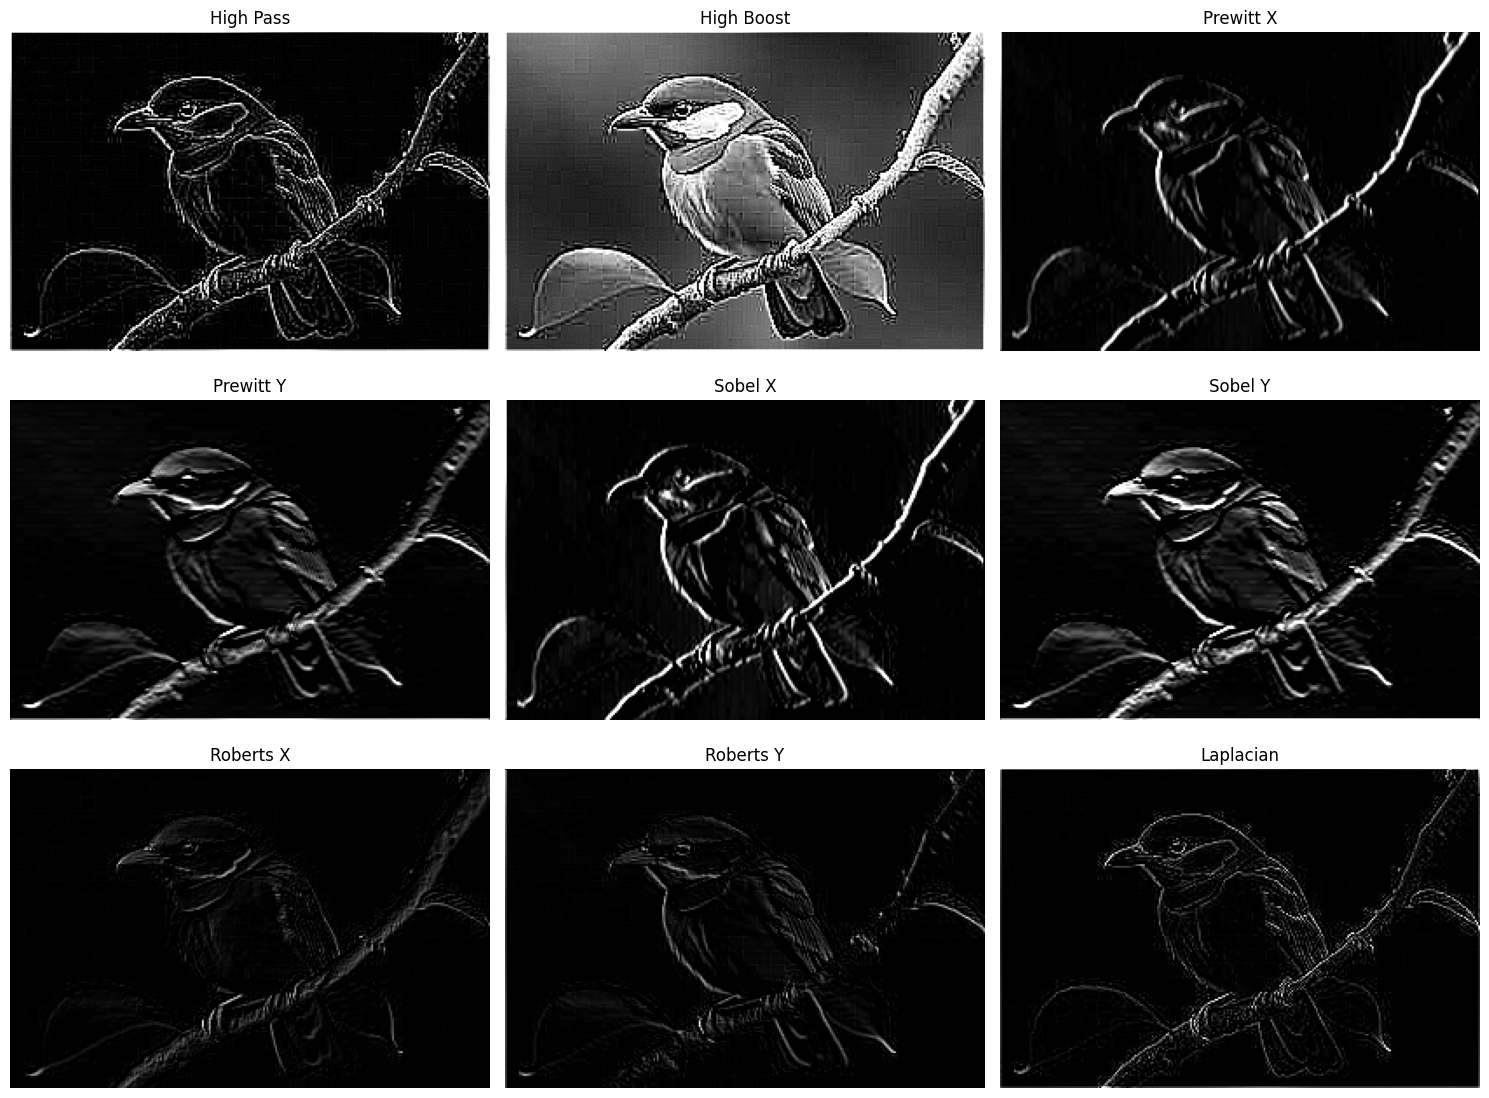

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the RGB image and convert it to grayscale for filtering
image_path = '/content/drive/MyDrive/birdie.jpg'
img = np.array(Image.open(image_path))
gray_img = np.mean(img, axis=2)  # Convert RGB to grayscale manually by averaging channels

# Convolution function (manual implementation)
def convolve(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    padded_img = np.pad(image, ((kh // 2, kh // 2), (kw // 2, kw // 2)), mode='constant', constant_values=0)
    output = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            region = padded_img[i:i + kh, j:j + kw]
            output[i, j] = np.sum(region * kernel)

    # Normalize and clip to range [0, 255]
    output = np.clip(output, 0, 255)
    return output

# Define kernels
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

high_boost_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])#Detect edges in specific directions

prewitt_y = np.array([[1,  1,  1],
                      [0,  0,  0],
                      [-1, -1, -1]])

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])#gives more weight to the center of the kernel for better edge detection.

sobel_y = np.array([[1,  2,  1],
                    [0,  0,  0],
                    [-1, -2, -1]])

roberts_x = np.array([[1,  0],
                      [0, -1]])#Detect diagonal edges

roberts_y = np.array([[0,  1],
                      [-1, 0]])

laplacian_kernel = np.array([[0, -1,  0],
                             [-1,  4, -1],
                             [0, -1,  0]])#Detect edges in all directions (horizontal, vertical, and diagonal).

# Apply filters
filters = {
    "High Pass": high_pass_kernel,
    "High Boost": high_boost_kernel,
    "Prewitt X": prewitt_x,
    "Prewitt Y": prewitt_y,
    "Sobel X": sobel_x,
    "Sobel Y": sobel_y,
    "Roberts X": roberts_x,
    "Roberts Y": roberts_y,
    "Laplacian": laplacian_kernel
}

# Apply each filter and display results
plt.figure(figsize=(15, 15))

for idx, (filter_name, kernel) in enumerate(filters.items()):
    filtered_img = convolve(gray_img, kernel)
    plt.subplot(4, 3, idx + 1)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(filter_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


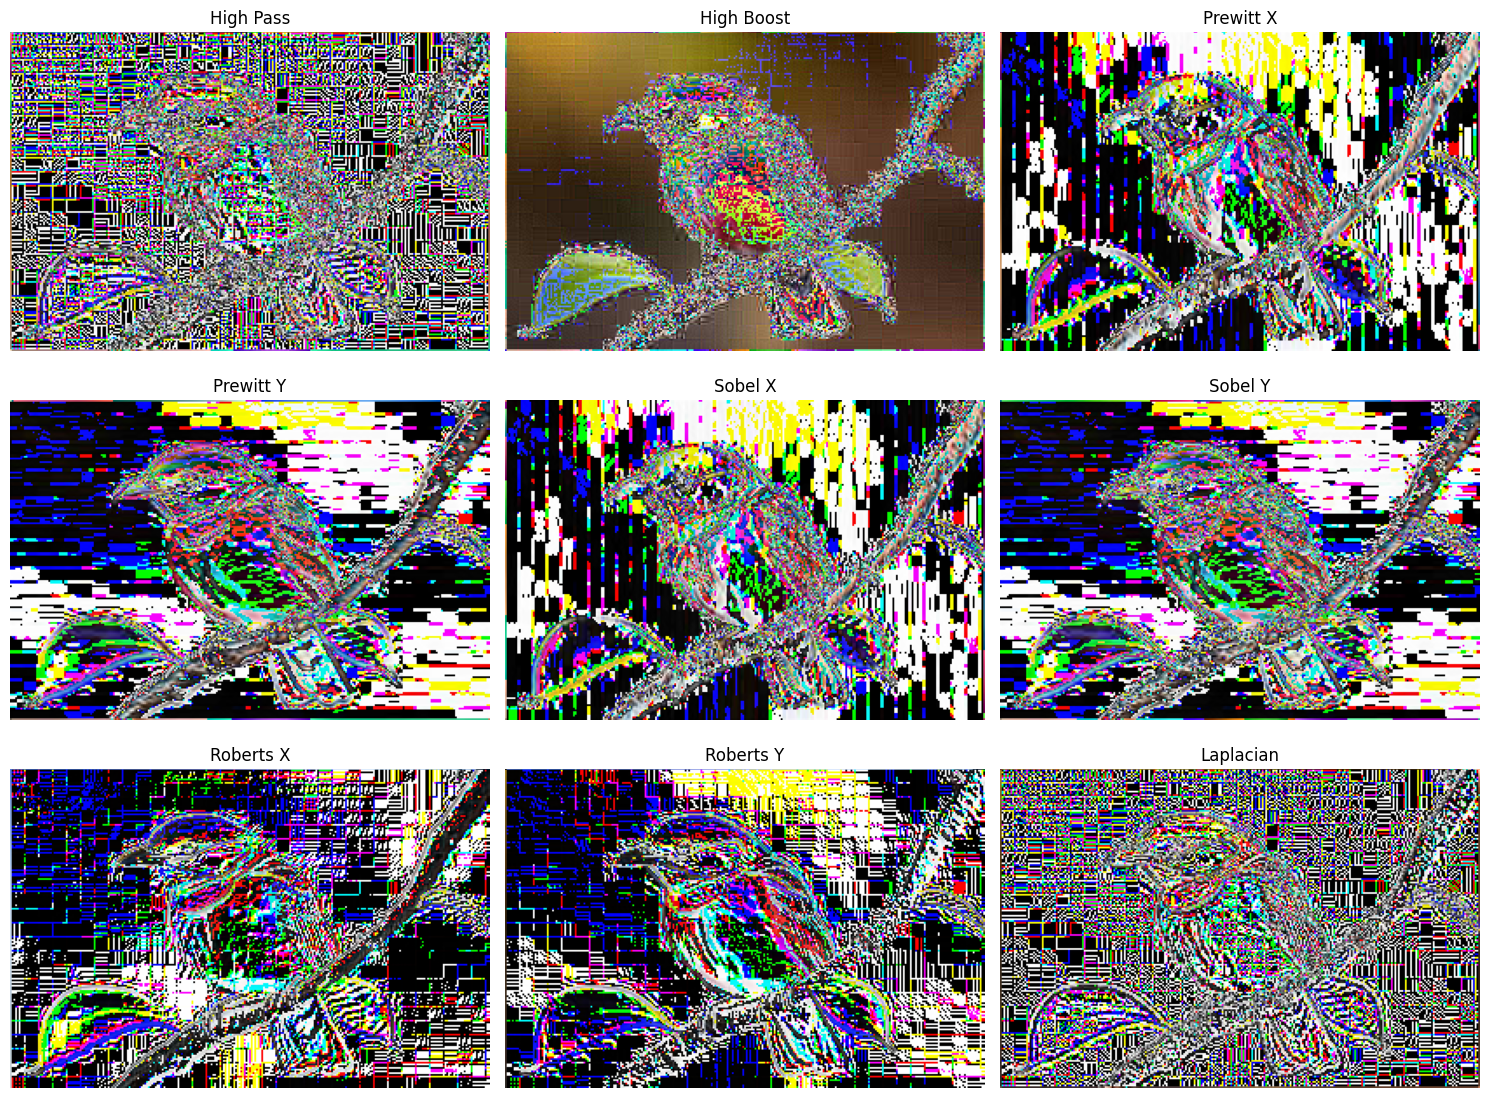

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the RGB image
image_path = '/content/drive/MyDrive/birdie.jpg'
img = np.array(Image.open(image_path))

# Convolution function (manual implementation for each channel)
def convolve_rgb(image, kernel):
    h, w, c = image.shape  # Get height, width, and number of channels (3 for RGB)
    kh, kw = kernel.shape
    padded_img = np.pad(image, ((kh // 2, kh // 2), (kw // 2, kw // 2), (0, 0)), mode='constant', constant_values=0)
    output = np.zeros_like(image)

    for channel in range(c):  # Process each channel (R, G, B)
        for i in range(h):
            for j in range(w):
                region = padded_img[i:i + kh, j:j + kw, channel]
                output[i, j, channel] = np.sum(region * kernel)

    # Normalize and clip to range [0, 255]
    output = np.clip(output, 0, 255)
    return output

# Define kernels
high_pass_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

high_boost_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])  # Example with A=2

prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[1,  1,  1],
                      [0,  0,  0],
                      [-1, -1, -1]])

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[1,  2,  1],
                    [0,  0,  0],
                    [-1, -2, -1]])

roberts_x = np.array([[1,  0],
                      [0, -1]])

roberts_y = np.array([[0,  1],
                      [-1, 0]])

laplacian_kernel = np.array([[0, -1,  0],
                             [-1,  4, -1],
                             [0, -1,  0]])

# Apply filters
filters = {
    "High Pass": high_pass_kernel,
    "High Boost": high_boost_kernel,
    "Prewitt X": prewitt_x,
    "Prewitt Y": prewitt_y,
    "Sobel X": sobel_x,
    "Sobel Y": sobel_y,
    "Roberts X": roberts_x,
    "Roberts Y": roberts_y,
    "Laplacian": laplacian_kernel
}

# Apply each filter and display results
plt.figure(figsize=(15, 15))

for idx, (filter_name, kernel) in enumerate(filters.items()):
    filtered_img = convolve_rgb(img, kernel)
    plt.subplot(4, 3, idx + 1)
    plt.imshow(filtered_img.astype(np.uint8))  # Convert to uint8 for display
    plt.title(filter_name)
    plt.axis('off')

plt.tight_layout()
plt.show()
